In [4]:
# Loading the required libraries and Dataset
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn as sb
import matplotlib.pyplot as plt
data=pd.read_csv('Assignment1_EDA.csv')
data.head(6)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,7/2/2014,CoffsHarbour,17.7,25.9,2.2,1.6,NaN,NNE,31.0,SW,...,76.0,66.0,1017.3,1016.5,7.0,4.0,21.5,24.2,Yes,No
1,23-04-2009,Portland,6.7,22.0,0.0,5.4,0.4,NNE,44.0,NE,...,65.0,37.0,1014.0,1008.8,7.0,8.0,14.0,21.8,No,Yes
2,8/11/2015,Watsonia,6.2,25.7,0.0,4.2,10.9,WSW,20.0,SE,...,71.0,28.0,1022.5,1019.4,2.0,7.0,12.8,23.6,No,No
3,21-11-2012,Wollongong,13.8,22.8,0.0,NaN,NaN,SSW,70.0,N,...,65.0,76.0,1017.0,1010.6,NaN,NaN,18.9,20.6,No,No
4,30-07-2013,Townsville,13.4,27.2,0.0,6.0,10.2,ENE,30.0,SSW,...,61.0,46.0,1016.8,1011.8,1.0,1.0,21.7,25.6,No,No
5,20-05-2016,Albany,10.1,21.8,0.0,0.8,NaN,NaN,NaN,N,...,93.0,NaN,1011.7,1003.9,1.0,NaN,12.9,NaN,No,Yes


In [5]:
# For better analysis and to avoid ambiguity:
#Average of Max and Min Temperature as Temp:
data['Temp']=(data['MinTemp']+data['MaxTemp'])/2

# Average of Humidity9am and Humidity3pm as Humidity:
data['Humidity']=(data['Humidity9am']+data['Humidity3pm'])/2

# Average of Pressure9am and Pressure3pm as Pressure:
data['Pressure']=(data['Pressure9am']+data['Pressure3pm'])/2

# Average of Cloud9am and Cloud3pm as Cloud:
data['Cloud']=(data['Cloud9am']+data['Cloud3pm'])/2

#Average of Temp9am and Temp3pm as Temp1:
data['Temp1']=(data['Temp9am']+data['Temp3pm'])/2

#Average of WindSpeed9am and WindSpeed3pm as WindSpeed:
data['WindSpeed']=(data['WindSpeed9am']+data['WindSpeed3pm'])/2

In [6]:
# Adding the above new columns :
data.head(3)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Temp9am,Temp3pm,RainToday,RainTomorrow,Temp,Humidity,Pressure,Cloud,Temp1,WindSpeed
0,7/2/2014,CoffsHarbour,17.7,25.9,2.2,1.6,NaN,NNE,31.0,SW,...,21.5,24.2,Yes,No,21.80,71.0,1016.90,5.5,22.85,13.0
1,23-04-2009,Portland,6.7,22.0,0.0,5.4,0.4,NNE,44.0,NE,...,14.0,21.8,No,Yes,14.35,51.0,1011.40,7.5,17.90,16.0
2,8/11/2015,Watsonia,6.2,25.7,0.0,4.2,10.9,WSW,20.0,SE,...,12.8,23.6,No,No,15.95,49.5,1020.95,4.5,18.20,6.5


In [7]:
# Dropping  the respective extra columns 
data=data.drop(['MaxTemp','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','WindSpeed9am','WindSpeed3pm'],axis=1)
data.head(5)


,Date,Location,MinTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,RainToday,RainTomorrow,Temp,Humidity,Pressure,Cloud,Temp1,WindSpeed
0,7/2/2014,CoffsHarbour,17.7,2.2,1.6,NaN,NNE,31.0,SW,ESE,Yes,No,21.80,71.0,1016.90,5.5,22.85,13.0
1,23-04-2009,Portland,6.7,0.0,5.4,0.4,NNE,44.0,NE,NNE,No,Yes,14.35,51.0,1011.40,7.5,17.90,16.0
2,8/11/2015,Watsonia,6.2,0.0,4.2,10.9,WSW,20.0,SE,E,No,No,15.95,49.5,1020.95,4.5,18.20,6.5
3,21-11-2012,Wollongong,13.8,0.0,NaN,NaN,SSW,70.0,N,NE,No,No,18.30,70.5,1013.80,NaN,19.75,28.0
4,30-07-2013,Townsville,13.4,0.0,6.0,10.2,ENE,30.0,SSW,NNW,No,No,20.30,53.5,1014.30,1.0,23.65,11.0


In [8]:
# Deriving numerical data in order to preprocess them .
num_data=data.select_dtypes(include=np.number)
num_data.head(4)

,MinTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,Temp,Humidity,Pressure,Cloud,Temp1,WindSpeed
0,17.7,2.2,1.6,NaN,31.0,21.80,71.0,1016.90,5.5,22.85,13.0
1,6.7,0.0,5.4,0.4,44.0,14.35,51.0,1011.40,7.5,17.90,16.0
2,6.2,0.0,4.2,10.9,20.0,15.95,49.5,1020.95,4.5,18.20,6.5
3,13.8,0.0,NaN,NaN,70.0,18.30,70.5,1013.80,NaN,19.75,28.0


In [9]:
# Missing Value Imputation 
# Finding out missing values
data.isnull().sum()

Date                 0
Location             0
MinTemp            436
Rainfall           970
Evaporation      42633
Sunshine         47482
WindGustDir       6581
WindGustSpeed     6540
WindDir9am        7062
WindDir3pm        2691
RainToday          970
RainTomorrow         0
Temp               593
Humidity          3006
Pressure          9965
Cloud            42812
Temp1             2291
WindSpeed         2177
dtype: int64

In [10]:
# Finding out the percentage of missing values in each column
data.isnull().sum()/len(data)*100

Date              0.000
Location          0.000
MinTemp           0.436
Rainfall          0.970
Evaporation      42.633
Sunshine         47.482
WindGustDir       6.581
WindGustSpeed     6.540
WindDir9am        7.062
WindDir3pm        2.691
RainToday         0.970
RainTomorrow      0.000
Temp              0.593
Humidity          3.006
Pressure          9.965
Cloud            42.812
Temp1             2.291
WindSpeed         2.177
dtype: float64

In [95]:
# Imputing the missing values of the below columns with Mean 
data['Cloud']=data['Cloud'].fillna(data['Cloud'].mean())
data['Pressure']=data['Pressure'].fillna(data['Pressure'].mean())
data['Humidity']=data['Humidity'].fillna(data['Humidity'].mean())
data['Temp']=data['Temp'].fillna(data['Temp'].mean())
data['Temp1']=data['Temp1'].fillna(data['Temp1'].mean())
data['Rainfall']=data['Rainfall'].fillna(data['Rainfall'].mean())
data['WindSpeed']=data['WindSpeed'].fillna(data['WindSpeed'].mean())
data['WindGustSpeed']=data['WindGustSpeed'].fillna(data['WindGustSpeed'].mean())
data['Evaporation']=data['Evaporation'].fillna(data['Evaporation'].mean())
data['MinTemp']=data['MinTemp'].fillna(data['MinTemp'].mean())
data.isnull().sum()/len(data)*100



Date              0.000
Location          0.000
MinTemp           0.000
Rainfall          0.000
Evaporation       0.000
Sunshine         47.482
WindGustDir       6.581
WindGustSpeed     0.000
WindDir9am        7.062
WindDir3pm        2.691
RainToday         0.970
RainTomorrow      0.000
Temp              0.000
Humidity          0.000
Pressure          0.000
Cloud             0.000
Temp1             0.000
WindSpeed         0.000
Month             0.000
dtype: float64

# 1. Find the windy (Highest wind speed and frequent high-speed winds) places to build a windmill. Also find the sunny places to setup a solar field. Take values more than 75 percentile as minimum values for analysis

In [96]:
# We first find the Wind Speed value at 75 percentile
data['WindSpeed']
data75=data['WindSpeed'].quantile(0.75)
data75 # Hence the wind speed is 20.5 at 75th percentile.

20.5

In [97]:
# Defining data_Highwinds  as those wind speeds above 75 percentile 
data_HighWinds=data[data['WindSpeed']>data75]
data_HighWinds 
# If you notice the column: WindSpeed in the below table, you can notice that Wind Speed is all more than 75th percentile which is 20.5


,Date,Location,MinTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,RainToday,RainTomorrow,Temp,Humidity,Pressure,Cloud,Temp1,WindSpeed,Month
3,2012-11-21,Wollongong,13.8,0.0,5.467535,NaN,SSW,70.0,N,NE,No,No,18.30,70.5,1013.80,4.476193,19.75,28.0,November
10,2012-03-31,Dartmoor,11.1,0.0,7.000000,8.1,WNW,39.0,W,W,No,No,16.45,65.0,1013.60,4.476193,18.30,23.0,March
12,2012-02-26,Ballarat,20.6,0.0,5.467535,NaN,N,65.0,NNE,N,No,Yes,26.45,54.0,1010.95,3.500000,26.20,38.0,February
16,2014-04-11,Mildura,12.5,0.0,7.600000,11.5,SW,48.0,N,W,No,No,23.20,9.0,1014.85,4.000000,27.75,24.0,April
20,2009-04-26,MelbourneAirport,7.2,1.8,5.200000,4.2,W,81.0,NNW,WNW,Yes,Yes,10.15,65.0,998.40,7.000000,10.35,39.0,April
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99985,2014-08-10,Sale,7.4,0.2,5.467535,NaN,W,52.0,W,WSW,No,No,12.55,64.0,1019.55,3.500000,14.70,27.5,August
99993,2010-07-05,MelbourneAirport,8.3,0.0,2.400000,0.7,N,41.0,N,NW,No,Yes,14.00,67.5,1019.80,7.000000,15.95,23.0,July
99994,2014-06-16,Uluru,4.0,0.0,5.467535,NaN,E,44.0,ESE,E,No,No,10.90,51.0,1027.05,4.476193,12.80,22.5,June
99995,2013-01-27,AliceSprings,17.6,0.0,15.600000,12.9,SE,44.0,SE,SE,No,No,26.00,15.0,1008.75,1.000000,29.55,26.0,January


In [98]:
# Places where Frequent High winds occur can be found out by finding the value count of locations with HighSpeed Winds.
data_FreqWinds=data_HighWinds['Location'].value_counts().reset_index()
data_FreqWinds.columns=['HighWindsLocation','Frequency']
data_FreqWinds.head(16)


,HighWindsLocation,Frequency
0,Ballarat,1081
1,GoldCoast,1076
2,SydneyAirport,1040
3,NorfolkIsland,1005
4,MelbourneAirport,987
5,MountGambier,904
6,Townsville,889
7,Woomera,884
8,PerthAirport,868
9,Cairns,769


In [99]:
# Answer: Hence the top 5 places in Australia with highest wind speed are Ballarat, GoldCoast,SydneyAirport,NorFork Island and Melbourne Airport

In [100]:
# To find the sunny places to set solar fields.
# Finding values for sunshine above 75 percentile
data['Sunshine']
sunshine75=data['Sunshine'].quantile(0.75)
sunshine75 # Hence the sunshine is 10.6  at 75th percentile.

10.6

In [101]:
# Defining data_sunny  as those sunshine values above 75 percentile 
data_sunny=data[data['Sunshine']>sunshine75]
data_sunny 
# If you notice the column: Sunshine in the below table, you can notice that the values for Sunshine is all more than 75th percentile which is 10.6
# Places where Frequent High winds occur can be found out by finding the value count of locations with HighSpeed Winds.



,Date,Location,MinTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,RainToday,RainTomorrow,Temp,Humidity,Pressure,Cloud,Temp1,WindSpeed,Month
2,2015-08-11,Watsonia,6.2,0.0,4.2,10.9,WSW,20.0,SE,E,No,No,15.95,49.5,1020.95,4.500000,18.20,6.5,August
7,2016-02-24,Moree,19.9,0.0,10.2,12.5,NNE,37.0,N,NW,No,No,27.45,39.5,1015.35,0.500000,29.30,16.5,February
14,2009-02-21,Woomera,16.2,0.0,14.2,12.5,SSE,44.0,SSE,SSE,No,No,23.80,39.0,1015.75,0.000000,23.75,18.5,February
16,2014-04-11,Mildura,12.5,0.0,7.6,11.5,SW,48.0,N,W,No,No,23.20,9.0,1014.85,4.000000,27.75,24.0,April
21,2009-03-22,Woomera,16.8,0.0,13.8,10.9,S,54.0,S,SSW,No,No,22.70,44.0,1014.35,1.000000,22.95,22.0,March
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99981,2009-02-03,Cairns,22.2,0.0,10.6,10.9,SE,48.0,SSE,ESE,No,No,27.10,57.0,1009.10,1.000000,29.30,25.5,February
99982,2013-05-14,Cairns,20.2,0.0,5.8,10.7,ENE,28.0,S,ENE,No,No,24.50,64.0,1011.55,3.000000,26.80,15.0,May
99991,2010-01-24,Moree,22.9,0.0,12.0,11.2,N,37.0,NNE,N,No,No,30.40,40.0,1010.65,1.000000,31.50,19.5,January
99992,2015-02-24,Dartmoor,7.0,0.0,6.2,12.0,SE,52.0,S,SSE,No,No,14.05,64.5,1022.10,4.476193,16.10,17.5,February


In [102]:
df=pd.DataFrame(data_sunny,columns=['Location','Sunshine'])
df.head(10)

,Location,Sunshine
2,Watsonia,10.9
7,Moree,12.5
14,Woomera,12.5
16,Mildura,11.5
21,Woomera,10.9
33,WaggaWagga,13.7
44,Moree,11.2
49,AliceSprings,11.9
67,Mildura,12.4
71,Woomera,12.3


In [103]:
# Therefore the most sunny places where we can set up solar fields are WaggaWagga,Moree,Woomera,AliceSprings,Mildura and Watsonia

# 2. Find the locations where humidity and temperature are more than 80 percentile value.

In [104]:
# Finding values for Humidity and Temperature  above 80 percentile  [ We use Temp as the Temperature here,Since I believe Temp  gives more meaning to the analysis in this context]
humidity_80=data['Humidity'].quantile(0.80)
Temp_80=data['Temp'].quantile(0.80)



In [105]:
humidity_80

75.5

In [106]:
Temp_80

23.4

In [107]:

#Finding Locations where Humidity and Temperature are above 80 percentile
location_Temp=data[data['Temp']>Temp_80]
location_humid=data[data['Humidity']>humidity_80]


In [108]:
df2=pd.DataFrame(location_Temp,columns=['Location','Temp'])
df2.head(5)

,Location,Temp
7,Moree,27.45
12,Ballarat,26.45
14,Woomera,23.80
26,Penrith,27.55
27,Katherine,26.55


In [109]:
#Therefore places where Temperature is more than 80 percentile value are Penrith, Moree,Katherine and Ballarat

In [110]:
df3=pd.DataFrame(location_humid,columns=['Location','Humidity'])
df3.head(5)

,Location,Humidity
9,Penrith,94.0
13,Bendigo,97.0
29,MountGambier,92.5
34,Launceston,79.5
37,GoldCoast,87.0


In [111]:
# Therefore places where Humidity is more than 80 percentile value are Bendigo,Penrith,MountGambier and GoldCoast.

# 3.Find 3 places where rainfall, sunshine, humidity is not too high or too low[ Use logical threshold using percentile values]

In [112]:
# Given below is the syntax to find outlier using Capping Method 
for i in num_data.columns:
    q1=num_data[i].quantile(0.25)
    q3=num_data[i].quantile(0.75)
    iqr=q3-q1
    ub=q3+1.5*iqr
    lb=q1-1.5*iqr
    uc=num_data[i].quantile(0.99)
    lc=num_data[i].quantile(0.01)
    
    ind1=num_data[data[i]>ub].index
    ind2=num_data[data[i]<lb].index
    
    num_data.loc[ind1,i]=uc
    num_data.loc[ind2,i]=lc
        

C:\Users\Dell\anaconda3\envs\tf_env\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\Dell\anaconda3\envs\tf_env\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


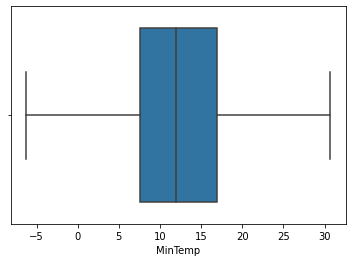

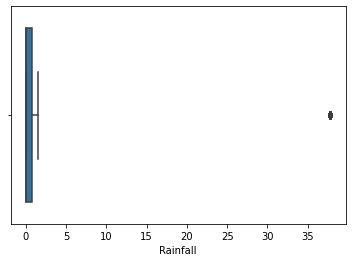

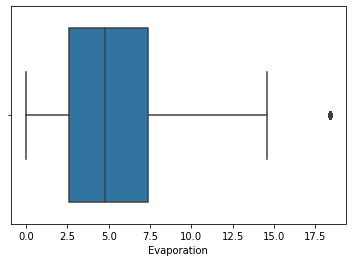

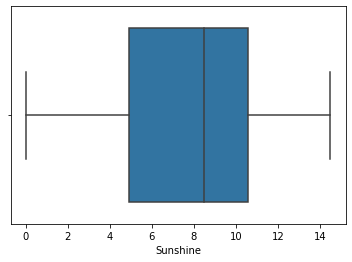

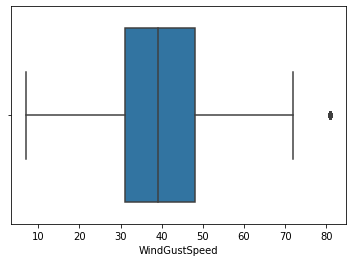

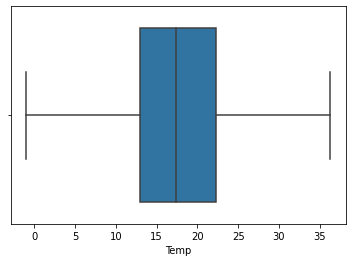

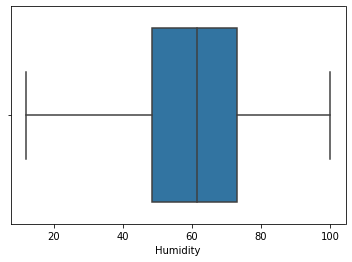

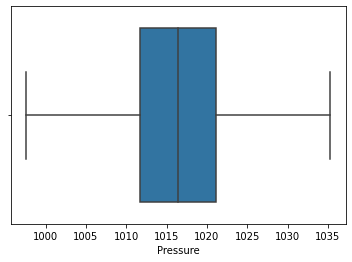

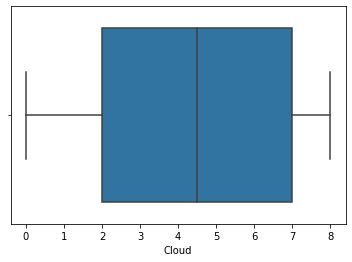

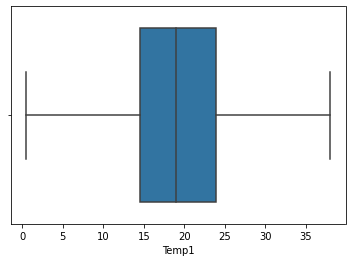

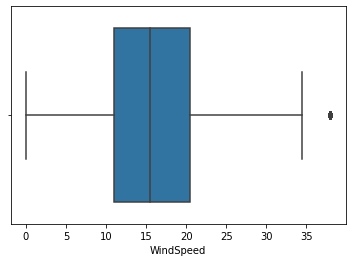

In [113]:
for i in num_data.columns:
    sb.boxplot(x=num_data[i])
    plt.show() # We can notice from the boxplots that there are hardly any outliers in the numerical columns

# Rainfall

In [114]:
# We now move forward to the analysis without outlier treatment
#On constant trial error we came  to a conclusion that 0.64th percentile yields us the lowest value.
data['Rainfall'].quantile(0.64) #You can play with the quantile values to check if its true

0.2

In [115]:
# And similarly 0.99th quantile as the Highest value
data['Rainfall'].quantile(0.99)

37.4

In [116]:
# Hence as the question demands using logical thresholds(Here I tried to find out the range of values that could possibly lie between the highest and lowest value 
Rainfall_q94=data['Rainfall'].quantile(0.92)
Rainfall_q97=data['Rainfall'].quantile(0.97)
print(Rainfall_q94)
print(Rainfall_q97) 


8.0
19.2


# Humidity


In [117]:
#0th Percentile  yields us the lowest value 
data['Humidity'].quantile(0)

1.0

In [118]:
#And 100th percentile yields the highest
data['Humidity'].quantile(1)

100.0

In [119]:
# Similarly  as the question demands using logical thresholds we find the values lying in between the highest and lowest 
Humidity_q20=data['Humidity'].quantile(0.20)
Humidity_q26=data['Humidity'].quantile(0.26)
print(Humidity_q20)
print(Humidity_q26)

45.5
50.0


# Sunshine

In [120]:
#Lowest Value
data['Sunshine'].quantile(0.1)

1.5

In [121]:
#Highest Value
data['Sunshine'].quantile(1)

14.5

In [122]:
#Possible Values in between Lowest and highest with its corresponding quantiles.
Sunshine_q34=data['Sunshine'].quantile(0.34)
Sunshine_q40=data['Sunshine'].quantile(0.40)
print(Sunshine_q34)
print(Sunshine_q40)

6.4
7.2


In [123]:
# As we found out the range earlier we will now derive 5 values in between the highest and lowest lying in the above mentioned range .These values are nothing but the"Not too High or Low" values
Rainfall_top5=data[data['Rainfall'].between(Rainfall_q92,Rainfall_q97)]
Humidity_top5=data[data['Humidity'].between(Humidity_q20,Humidity_q26)]
Sunshine_top5=data[data['Sunshine'].between(Sunshine_q34,Sunshine_q40)]

In [124]:
#Finding out the locations lying in the middle range

In [125]:
 Rainfall_top5=Rainfall_top5[Rainfall_top5['Rainfall'].between(Rainfall_q92,Rainfall_q97)]
Rainfall_top5['Location'].head(5)

17          WaggaWagga
24             Walpole
48    MelbourneAirport
58             Penrith
65              Sydney
Name: Location, dtype: object

In [126]:
Humidity_top5=Humidity_top5[Humidity_top5['Humidity'].between(Humidity_q20,Humidity_q26)]
Humidity_top5['Location'].head(5)

2        Watsonia
22     Wollongong
43     WaggaWagga
113       Woomera
122      Richmond
Name: Location, dtype: object

In [127]:
Sunshine_top5=Sunshine_top5[Sunshine_top5['Sunshine'].between(Sunshine_q34,Sunshine_q40)]
Sunshine_top5['Location'].head(5)

6              Sale
40          Mildura
65           Sydney
148    MountGambier
244    AliceSprings
Name: Location, dtype: object

# 4. Top 5 coastal places where evaporation is higher than mean for setting up salt preparation plants

In [128]:
# We first find out the mean of Evaporation
Evaporation_mean=data['Evaporation'].mean()
# Then the values above mean 
Coastal_places=data[data['Evaporation']>Evaporation_mean]
#Now using Groupby we find the Places with Evaporation above mean.
Top_Coastal=Coastal_places.groupby('Location')['Evaporation'].sum().reset_index()
# We finally introduce columns as below by setting Level of evaporation in descending order for better understanding .
Top_Coastal.columns=['Location','Level of Evaporation']
Top_Coastal.sort_values(by='Level of Evaporation',ascending=False).head()


,Location,Level of Evaporation
48,Woomera,17684.625532
3,AliceSprings,16761.403049
39,Townsville,13170.622262
21,Moree,12279.670056
40,Tuggeranong,11536.499573


In [129]:
# Therefore the Top 5 locations where we can setup salt plants are Woomera,AliceSprings,Townsville,Moree and Tuggeranong

# 5. Suggest a strategy for a winter goods company to choose the location and months to promote their products.

In [130]:
#Since we need MinTempto analyze winterplaces we did'nt drop it earlier.
# First we find the average minimum temperature and define temperature values below that as  winter.
data['MinTemp'].mean()

12.190558836527256

In [131]:
# We then find the Months when its winter.
data['Date']=pd.to_datetime(data['Date'])
AvgMinTemp=data['MinTemp'].mean()
Winterplaces=data[data['MinTemp']<AvgMinTemp]
data['Month']=data['Date'].dt.month_name()
Winterplaces['Month']=data['Month']


C:\Users\Dell\anaconda3\envs\tf_env\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [132]:
data.head()

,Date,Location,MinTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,RainToday,RainTomorrow,Temp,Humidity,Pressure,Cloud,Temp1,WindSpeed,Month
0,2014-07-02,CoffsHarbour,17.7,2.2,1.600000,NaN,NNE,31.0,SW,ESE,Yes,No,21.80,71.0,1016.90,5.500000,22.85,13.0,July
1,2009-04-23,Portland,6.7,0.0,5.400000,0.4,NNE,44.0,NE,NNE,No,Yes,14.35,51.0,1011.40,7.500000,17.90,16.0,April
2,2015-08-11,Watsonia,6.2,0.0,4.200000,10.9,WSW,20.0,SE,E,No,No,15.95,49.5,1020.95,4.500000,18.20,6.5,August
3,2012-11-21,Wollongong,13.8,0.0,5.467535,NaN,SSW,70.0,N,NE,No,No,18.30,70.5,1013.80,4.476193,19.75,28.0,November
4,2013-07-30,Townsville,13.4,0.0,6.000000,10.2,ENE,30.0,SSW,NNW,No,No,20.30,53.5,1014.30,1.000000,23.65,11.0,July


In [133]:
Winterplaces.head(5)

,Date,Location,MinTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,RainToday,RainTomorrow,Temp,Humidity,Pressure,Cloud,Temp1,WindSpeed,Month
1,2009-04-23,Portland,6.7,0.0,5.4,0.4,NNE,44.000000,NE,NNE,No,Yes,14.35,51.000000,1011.40,7.500000,17.900000,16.000000,April
2,2015-08-11,Watsonia,6.2,0.0,4.2,10.9,WSW,20.000000,SE,E,No,No,15.95,49.500000,1020.95,4.500000,18.200000,6.500000,August
5,2016-05-20,Albany,10.1,0.0,0.8,NaN,NaN,39.986818,N,NaN,No,Yes,15.95,60.118281,1007.80,4.476193,19.322685,16.330638,May
8,2009-04-28,Portland,7.1,3.6,1.4,3.4,SW,37.000000,S,S,Yes,No,10.05,58.000000,1022.35,5.000000,10.700000,13.000000,April
10,2012-03-31,Dartmoor,11.1,0.0,7.0,8.1,WNW,39.000000,W,W,No,No,16.45,65.000000,1013.60,4.476193,18.300000,23.000000,March


In [134]:
# Finally we find the locations where its winter during the above mentioned months.
Winterplaces=Winterplaces.drop_duplicates(subset='Location',keep='first')
Winterplaces.sort_values(by='MinTemp',inplace=True)
Winterplaces[['Location','MinTemp','Month']].head()


,Location,MinTemp,Month
204,AliceSprings,-3.0,July
28,Tuggeranong,-2.4,July
34,Launceston,2.8,May
31,MountGinini,3.1,September
111,Moree,3.5,July


In [135]:
# Therefore according to our understanding Wintergoods company can identify the above locations to sell their products . These places are AliceSprings,Tuggeranong,Launceston,MountGinini and Moree

# 6.	Create a new column as rainfall level with values as no, low, medium, high, heavy as categories and do the bivariate analyses between rainfall level and wind direction 
 - no rain    ------> 0 percentile
 -low --------->0-25 percentile
 -medium--------->25-50 percentile
-high--------->50-75 percentile
-heavy--------->75-100 percentile


In [160]:
# Value of Rainfall at 0 percentile(no rain)
q0=data['Rainfall'].quantile(0)
q0

0.0

In [161]:
# Value of rainfall at 25th percentile(low rain)
q25=data['Rainfall'].quantile(0.25)
q25

0.0

In [162]:
# Value of rainfall at 50 th percentile(medium rain)
q50=data['Rainfall'].quantile( 0.50)
q50

0.0

In [163]:
# Value of rainfall at 75th percentile(high rain)
q75=data['Rainfall'].quantile(0.75)
q75

0.8

In [93]:
# Value of rainfall at 100th percentile(heavy rain)
q100=data['Rainfall'].quantile(1)
q100

278.4

In [164]:
# Labeling the levels of rainfall based on its above mentioned percentile value
norain=data[data['Rainfall']==q0]
norain['Rainfall Levels']='No Rain'
lowrain=data[data['Rainfall'].between(q0,q25)]
lowrain['Rainfall Levels']='Low Rain'
medrain=data[data['Rainfall'].between(q25,q50)]
medrain['Rainfall Levels']='Medium Rain'
highrain=data[data['Rainfall'].between(q50,q75)]
highrain['Rainfall Levels']='High Rain'
heavyrain=data[data['Rainfall'].between(q75,q100)]
heavyrain['Rainfall Levels']='Heavy Rain'

C:\Users\Dell\anaconda3\envs\tf_env\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Dell\anaconda3\envs\tf_env\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Dell\anaconda3\envs\tf_env\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

In [142]:
# Concatting all othe above labels together as Rainfall Levels
rainfalldata=pd.concat([norain,lowrain,medrain,highrain,heavyrain])
rainfalldata['Rainfall Levels'].unique()


array(['No Rain', 'Low Rain', 'Medium Rain', 'High Rain', 'Heavy Rain'],
      dtype=object)

In [165]:
# Framing a crosstable with WindGust Direction and Rainfall Levels
table=pd.crosstab(index=rainfalldata['WindGustDir'],columns=rainfalldata['Rainfall Levels'])
table

Rainfall Levels,Heavy Rain,High Rain,Low Rain,Medium Rain,No Rain
WindGustDir,,,,,
E,1082,5372,4724,4724,4724
ENE,965,4780,4231,4231,4231
ESE,1066,4153,3586,3586,3586
N,1148,5172,4351,4351,4351
NE,789,4233,3738,3738,3738
NNE,758,3809,3307,3307,3307
NNW,1075,3642,3037,3037,3037
NW,1480,4269,3563,3563,3563
S,1942,4396,3565,3565,3565


<AxesSubplot:xlabel='WindGustDir'>

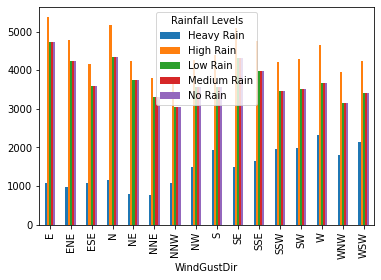

In [144]:
#Plotting a bar plot based on the above table 
table.plot(kind='bar')

In [ ]:
# On analysing the above bar plot we can state that High Rains are quite prominent in Australia across all wind directions.

# 7. Plot the correlation heatmap between the numerical variables

<AxesSubplot:>

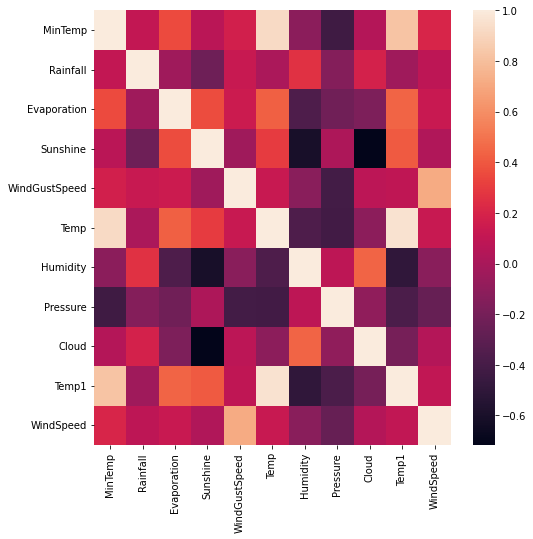

In [54]:
#Plotting correlation heatmap of numerical variables using the following libraries 
from matplotlib import pyplot as plt
import seaborn as sb
plt.figure(figsize=(8,8))
data_num=data._get_numeric_data()
sb.heatmap(data_num.corr())

In [ ]:
#Correlation ranges from-1 to +1 , the above correlation heatmap shows the relationship between the various columns .
# As the colour of the box intensifies into dark shades we can say that the relationship between the corresponding 2 columns  is negative but however correlation exists as it gets closer to (-)1.
#Similarly as the colour of the box gets lighter we can say that the relationship is positive and it gets closer to (+)1.
# Please note that Min Temp is included in Temp hence we need not include that column for analysis.

# 8.	Perform the appropriate Missing value treatments for each columns

In [68]:
# Finding the missing values 
data.isnull().sum()

Date                 0
Location             0
MinTemp            436
Rainfall           970
Evaporation      42633
Sunshine         47482
WindGustDir       6581
WindGustSpeed     6540
WindDir9am        7062
WindDir3pm        2691
RainToday          970
RainTomorrow         0
dtype: int64

In [ ]:
#(a)Computing  the percentage of missing values in each column

In [69]:
data.isnull().sum()/len(data)*100

Date              0.000
Location          0.000
MinTemp           0.436
Rainfall          0.970
Evaporation      42.633
Sunshine         47.482
WindGustDir       6.581
WindGustSpeed     6.540
WindDir9am        7.062
WindDir3pm        2.691
RainToday         0.970
RainTomorrow      0.000
dtype: float64

In [ ]:
#(b)Explore dropping the row or dropping the column strategy is appropriate for this data

In [70]:
#Since sunshine has more than 40% of null values we can  drop that column
data.drop('Sunshine',axis=1)


,Date,Location,MinTemp,Rainfall,Evaporation,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,7/2/2014,CoffsHarbour,17.7,2.2,1.6,NNE,31.0,SW,ESE,Yes,No
1,23-04-2009,Portland,6.7,0.0,5.4,NNE,44.0,NE,NNE,No,Yes
2,8/11/2015,Watsonia,6.2,0.0,4.2,WSW,20.0,SE,E,No,No
3,21-11-2012,Wollongong,13.8,0.0,NaN,SSW,70.0,N,NE,No,No
4,30-07-2013,Townsville,13.4,0.0,6.0,ENE,30.0,SSW,NNW,No,No
...,...,...,...,...,...,...,...,...,...,...,...
99995,27-01-2013,AliceSprings,17.6,0.0,15.6,SE,44.0,SE,SE,No,No
99996,14-08-2010,Melbourne,10.2,0.0,3.8,N,89.0,N,N,No,No
99997,26-10-2015,SydneyAirport,17.1,0.0,7.0,W,85.0,N,NE,No,Yes
99998,6/4/2012,Albany,NaN,0.8,3.8,NaN,NaN,NaN,NaN,No,No


In [ ]:
#(c)Explore mean/median imputation is preferable for any column

In [ ]:
# Columns with less than 3% null values can go for mean/median imputation .Columns with outliers and less than 3% can go for median imputation.

In [ ]:
#Identifying if data has outliers

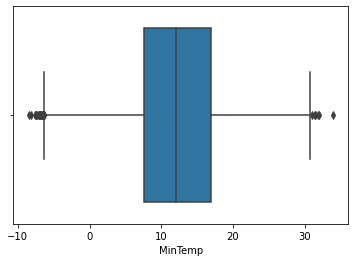

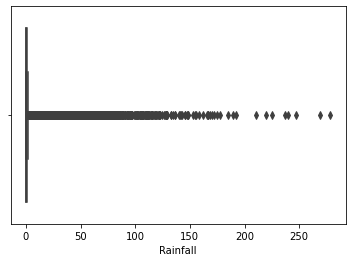

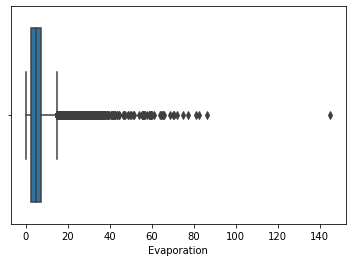

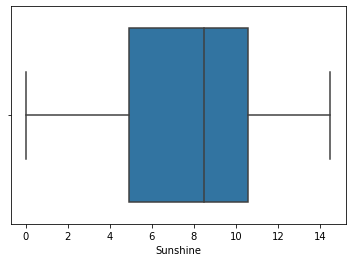

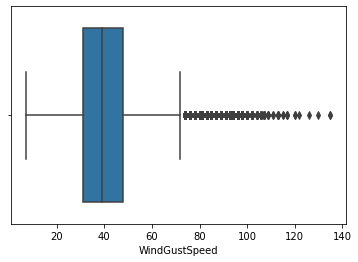

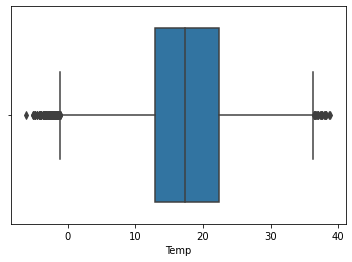

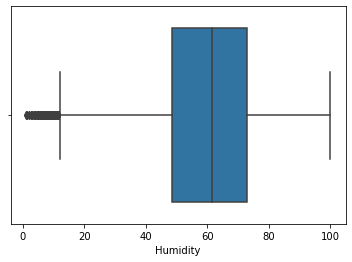

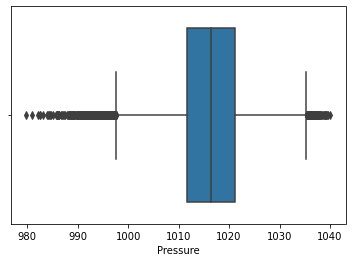

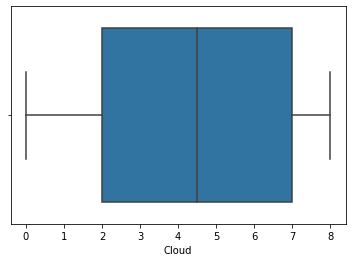

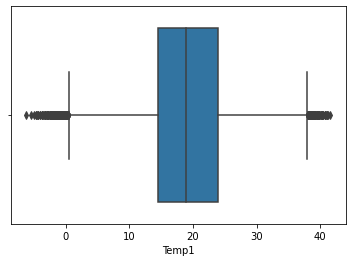

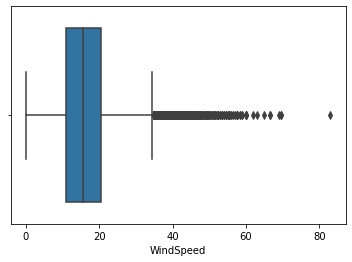

In [16]:
import seaborn as sb
import matplotlib.pyplot as plt
for i in num_data.columns:
    sb.boxplot(x=num_data[i])
    plt.show()

# MinTemp

In [167]:
# Analysing important characterstics of MinTemp using describe()
data['MinTemp'].describe()

count    100000.000000
mean         12.190559
std           6.398855
min          -8.500000
25%           7.600000
50%          12.000000
75%          16.800000
max          33.900000
Name: MinTemp, dtype: float64

In [168]:
# Performing median imputation on MinTemp as it has outliers
data['MinTemp']=data['MinTemp'].fillna(data['MinTemp'].median())

In [169]:
data['MinTemp'].isnull().sum() # MinTemp no more has null value

0

In [170]:
data['MinTemp'].describe()# Analyzing the change in below given characterstics after imputation.

count    100000.000000
mean         12.190559
std           6.398855
min          -8.500000
25%           7.600000
50%          12.000000
75%          16.800000
max          33.900000
Name: MinTemp, dtype: float64

# Rainfall

In [21]:
# Analysing important characterstics of Rainfall  using describe()
data['Rainfall'].describe()

count    100000.000000
mean          2.324117
std           8.320062
min           0.000000
25%           0.000000
50%           0.000000
75%           0.600000
max         278.400000
Name: Rainfall, dtype: float64

In [12]:
# Performing median imputation on MinTemp as it has outliers
data['Rainfall']=data['Rainfall'].fillna(data['Rainfall'].median())

In [13]:
data['Rainfall'].isnull().sum()# Rainfall nomore has nullvalue

0

# WindGustSpeed

In [30]:
# Analysing important characterstics of WindGustSpeed  using describe()
data['WindGustSpeed'].describe()

count    100000.000000
mean         39.922280
std          13.139831
min           7.000000
25%          31.000000
50%          39.000000
75%          46.000000
max         135.000000
Name: WindGustSpeed, dtype: float64

In [31]:
# Performing median imputation on MinTemp as it has outliers
data['WindGustSpeed']=data['WindGustSpeed'].fillna(data['WindGustSpeed'].median())

In [32]:
data['WindGustSpeed'].isnull().sum()# WindGustSpeed nomore has nullvalue

0

In [34]:
data['WindGustSpeed'].describe()# Analyze the change in the below given characterstics after imputation 

count    100000.000000
mean         39.922280
std          13.139831
min           7.000000
25%          31.000000
50%          39.000000
75%          46.000000
max         135.000000
Name: WindGustSpeed, dtype: float64

# Temp

In [35]:
# Analysing important characterstics of Temp  using describe()
data['Temp'].describe()

count    99407.000000
mean        17.709175
std          6.304051
min         -6.150000
25%         12.950000
50%         17.400000
75%         22.300000
max         38.800000
Name: Temp, dtype: float64

In [40]:
# Performing median imputation on Temp as it has outliers
data['Temp']=data['Temp'].fillna(data['Temp'].median())

In [41]:
data['Temp'].isnull().sum() # Nomore nullvalues in Temp

0

In [39]:
data['Temp'].describe() # Analyze the change in the below given characterstics after imputation 

count    100000.000000
mean         17.707341
std           6.285376
min          -6.150000
25%          13.000000
50%          17.400000
75%          22.300000
max          38.800000
Name: Temp, dtype: float64

# Humidity

In [46]:
data['Humidity'].describe()# Analyzing important characterstics of Humidity using describe() 

count    100000.000000
mean         60.159815
std          17.942613
min           1.000000
25%          49.000000
50%          61.500000
75%          72.500000
max         100.000000
Name: Humidity, dtype: float64

In [43]:
data['Humidity']=data['Humidity'].fillna(data['Humidity'].median()) # Performing median imputation on Humidity as it has outliers

In [44]:
data['Humidity'].isnull().sum() #No more missing values found in Humidity

0

In [45]:
data['Humidity'].describe() # Analyzing the change in the characterstics after imputing missing values

count    100000.000000
mean         60.159815
std          17.942613
min           1.000000
25%          49.000000
50%          61.500000
75%          72.500000
max         100.000000
Name: Humidity, dtype: float64

# Pressure

In [50]:
data['Pressure'].describe()# Analyzing important characterstics of Pressure using describe() 

count    100000.000000
mean       1016.433506
std           6.642434
min         979.750000
25%        1012.300000
50%        1016.400000
75%        1020.550000
max        1040.050000
Name: Pressure, dtype: float64

In [51]:
data['Pressure']=data['Pressure'].fillna(data['Pressure'].median()) # Performing median imputation on Pressure as it has outliers

In [52]:
data['Pressure'].isnull().sum()#No more missing values found in Pressure

0

In [49]:
data['Pressure'].describe() # Analyzing the change in the characterstics after imputing missing values

count    100000.000000
mean       1016.433506
std           6.642434
min         979.750000
25%        1012.300000
50%        1016.400000
75%        1020.550000
max        1040.050000
Name: Pressure, dtype: float64

# Cloud

In [53]:
data['Cloud'].describe()# Analyzing important characterstics of Cloud using describe() 

count    57188.000000
mean         4.476193
std          2.504489
min          0.000000
25%          2.000000
50%          4.500000
75%          7.000000
max          8.000000
Name: Cloud, dtype: float64

In [54]:
data['Cloud']=data['Cloud'].fillna(data['Cloud'].mean()) # Performing mean imputation on Cloud as it has no  outliers

In [55]:
data['Cloud'].isnull().sum()#No more missing values found in Cloud

0

In [57]:
data['Cloud'].describe() # Analyzing the change in the characterstics after imputing missing values

count    100000.000000
mean          4.476193
std           1.893956
min           0.000000
25%           4.000000
50%           4.476193
75%           5.500000
max           8.000000
Name: Cloud, dtype: float64

# Temp1

In [58]:
data['Temp1'].describe()# Analyzing important characterstics of Temp1 using describe() 

count    97709.000000
mean        19.322685
std          6.464446
min         -6.300000
25%         14.500000
50%         18.950000
75%         23.900000
max         41.600000
Name: Temp1, dtype: float64

In [62]:
data['Temp1']=data['Temp1'].fillna(data['Temp1'].median()) # Performing median imputation on Temp1 as it has outliers


In [63]:
data['Temp1'].isnull().sum()#No more missing values found in Temp1

0

In [64]:
data['Temp1'].describe() # Analyzing the change in the characterstics after imputing missing values

count    100000.000000
mean         19.322685
std           6.389966
min          -6.300000
25%          14.650000
50%          19.150000
75%          23.750000
max          41.600000
Name: Temp1, dtype: float64

# WindSpeed

In [11]:
data['WindSpeed'].describe()# Analyzing important characterstics of WindSpeed using describe() 

count    100000.000000
mean         16.312555
std           7.604035
min           0.000000
25%          11.000000
50%          15.500000
75%          20.500000
max          83.000000
Name: WindSpeed, dtype: float64

In [12]:
data['WindSpeed']=data['WindSpeed'].fillna(data['WindSpeed'].median()) # Performing median imputation on WindSpeed as it has outliers

In [13]:
data['WindSpeed'].isnull().sum()#No more missing values found in WindSpeed

0

In [14]:
data['WindSpeed'].describe() # Analyzing the change in the characterstics after imputing missing values

count    100000.000000
mean         16.312555
std           7.604035
min           0.000000
25%          11.000000
50%          15.500000
75%          20.500000
max          83.000000
Name: WindSpeed, dtype: float64

In [ ]:
#(d)Explore groupby based imputation

In [52]:
data.groupby('Humidity')['Evaporation'].mean()

Humidity
1.0      12.000000
1.5      13.200000
2.0      16.600000
2.5      16.400000
3.0      16.333333
           ...    
98.0      2.408000
98.5      2.477273
99.0      2.522727
99.5      2.003226
100.0     2.405714
Name: Evaporation, Length: 199, dtype: float64

<AxesSubplot:ylabel='Density'>

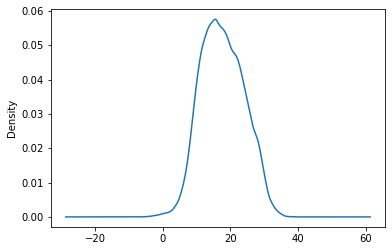

In [53]:
data['Temp'].fillna(data.groupby('Humidity')['Evaporation'].transform('mean')).plot(kind='kde')

In [54]:
data['Evaporation'].fillna(data.groupby('Humidity')['Evaporation'].transform('mean')).isnull().sum()

1734

In [ ]:
#(e)Explore mode based and rule based imputation for categorical columns

In [58]:
cat_data=data.select_dtypes(exclude=np.number)

In [59]:
cat_data.head(5)

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,7/2/2014,CoffsHarbour,NNE,SW,ESE,Yes,No
1,23-04-2009,Portland,NNE,NE,NNE,No,Yes
2,8/11/2015,Watsonia,WSW,SE,E,No,No
3,21-11-2012,Wollongong,SSW,N,NE,No,No
4,30-07-2013,Townsville,ENE,SSW,NNW,No,No


In [60]:
cat_data.isnull().sum()

Date               0
Location           0
WindGustDir     6581
WindDir9am      7062
WindDir3pm      2691
RainToday        970
RainTomorrow       0
dtype: int64

In [61]:
cat_data.isnull().sum()/len(data)*100

Date            0.000
Location        0.000
WindGustDir     6.581
WindDir9am      7.062
WindDir3pm      2.691
RainToday       0.970
RainTomorrow    0.000
dtype: float64

In [ ]:
data['RainToday']=data['RainToday'].fillna(data['RainToday'].mode())

In [86]:
data['RainToday'].isnull().sum()

970

In [87]:
data['WindDir3pm']=data['WindDir3pm'].fillna(data['WindDir3pm'].mode())

In [88]:
data['WindDir3pm'].isnull().sum()

2691

# 9.	Comment about the Normality of each numerical feature in the dataset

In [57]:
# Numerical dataframe:
num_data.head(5)

,MinTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,Temp,Humidity,Pressure,Cloud,Temp1,WindSpeed
0,17.7,37.8,1.6,NaN,31.0,21.80,71.0,1016.90,5.5,22.85,13.0
1,6.7,0.0,5.4,0.4,44.0,14.35,51.0,1011.40,7.5,17.90,16.0
2,6.2,0.0,4.2,10.9,20.0,15.95,49.5,1020.95,4.5,18.20,6.5
3,13.8,0.0,NaN,NaN,70.0,18.30,70.5,1013.80,NaN,19.75,28.0
4,13.4,0.0,6.0,10.2,30.0,20.30,53.5,1014.30,1.0,23.65,11.0


<AxesSubplot:ylabel='Density'>

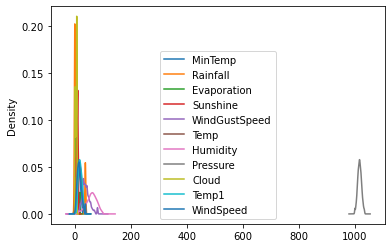

In [64]:
# Normal Distribution plot of each column in the Numericaldataframe:
num_data.plot(kind='kde')

In [ ]:
#From the above plot we can conclude that except Temp every other numeric column follows normal distribution or atleast close to normal distribution.

# 10.Apply Transformations to make the data close to NormalDistribution(Perform on any 3 features)

In [ ]:
#Please note that we use trial and error transformations in order to bring skewness close to normal which is 0 and upto 0.5 is permissable.

<AxesSubplot:ylabel='Density'>

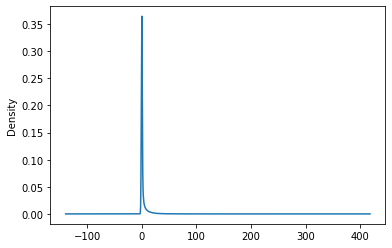

In [154]:
#Initial Normal Distribution Plot:
num_data['Rainfall'].plot(kind='kde')

# Rainfall

In [155]:
#Initial Skewness
num_data['Rainfall'].skew()

9.091403830067811

In [55]:
#Transformation
num_data['Rainfall']=np.power(num_data['Rainfall'],0.001).skew()

0.5611315450194605

<AxesSubplot:ylabel='Density'>

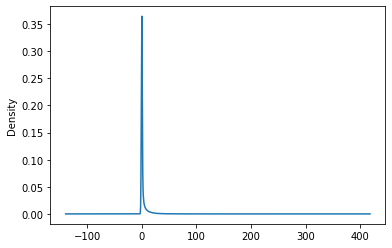

In [157]:
#Plot after transformation
num_data['Rainfall'].plot(kind='kde')

# WindGustSpeed

<AxesSubplot:ylabel='Density'>

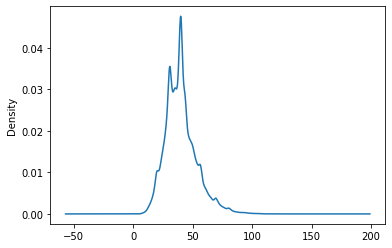

In [156]:
#Initial Normal Dist Plot
num_data['WindGustSpeed'].plot(kind='kde')

In [57]:
#Initial Skewness
num_data['WindGustSpeed'].skew()

0.7592605440798507

In [58]:
#On performing Transformation 
np.power(num_data['WindGustSpeed'],0.5).skew() 
num_data['WindGustSpeed']=np.power(num_data['WindGustSpeed'],0.5).skew() 

0.24690531502328564

<AxesSubplot:ylabel='Density'>

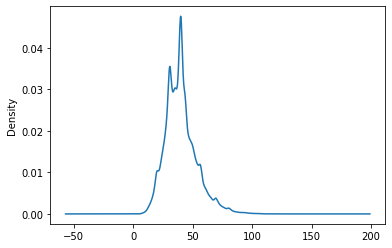

In [158]:
#Normal Dist Plot After Transformation
num_data['WindGustSpeed'].plot(kind='kde')

# Evaporation

<AxesSubplot:ylabel='Density'>

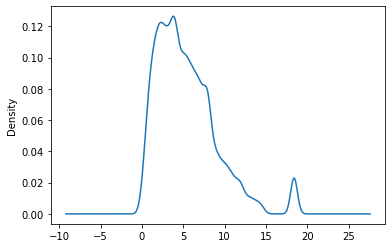

In [59]:
#Inital Normal Dist Plot:
num_data['Evaporation'].plot(kind='kde')

In [60]:
#Initial Skewness
num_data['Evaporation'].skew()

1.2393038288567249

In [61]:
#On performing Transformation
np.power(num_data['Evaporation'],0.5).skew() 
num_data['Evaporation']=np.power(num_data['Evaporation'],0.5).skew()

0.23731928479449366

<AxesSubplot:ylabel='Density'>

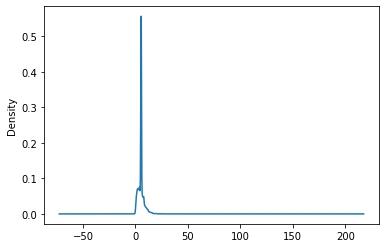

In [159]:
# Normal Distribution Plot after transformation
num_data['Evaporation'].plot(kind='kde')

# 11. Apply all three types of scaling on numeric columns

In [145]:
# Deriving Numerical columns alone once again for scaling 
num_data=data.select_dtypes(include=np.number)
num_data.head(5)

,MinTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,Temp,Humidity,Pressure,Cloud,Temp1,WindSpeed
0,17.7,2.2,1.600000,NaN,31.0,21.80,71.0,1016.90,5.500000,22.85,13.0
1,6.7,0.0,5.400000,0.4,44.0,14.35,51.0,1011.40,7.500000,17.90,16.0
2,6.2,0.0,4.200000,10.9,20.0,15.95,49.5,1020.95,4.500000,18.20,6.5
3,13.8,0.0,5.467535,NaN,70.0,18.30,70.5,1013.80,4.476193,19.75,28.0
4,13.4,0.0,6.000000,10.2,30.0,20.30,53.5,1014.30,1.000000,23.65,11.0


In [146]:
# Using Standard Scaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
num_data_sc=sc.fit_transform(num_data)
num_data_sc=pd.DataFrame(num_data_sc)
num_data_sc.columns=num_data.columns

In [147]:
num_data_sc.head(2)

,MinTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,Temp,Humidity,Pressure,Cloud,Temp1,WindSpeed
0,0.861009,-0.017661,-1.219673,NaN,-0.684058,0.650856,0.606529,0.069671,0.540568,0.552011,-0.438067
1,-0.858058,-0.282184,-0.021298,-1.91005,0.305475,-0.534449,-0.508238,-0.758343,1.596564,-0.222645,-0.043488


In [148]:
#Using MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
num_data_mm=mm.fit_transform(num_data)
num_data_mm=pd.DataFrame(num_data_mm)
num_data_mm.columns=num_data.columns

In [149]:
num_data_mm.head(2)

,MinTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,Temp,Humidity,Pressure,Cloud,Temp1,WindSpeed
0,0.617925,0.007902,0.011034,NaN,0.187500,0.621802,0.707071,0.616086,0.6875,0.608559,0.156627
1,0.358491,0.000000,0.037241,0.027586,0.289062,0.456062,0.505051,0.524876,0.9375,0.505219,0.192771


In [152]:
# Using Robust Scaler
from sklearn.preprocessing import RobustScaler
rb=RobustScaler()
num_data_rb=rb.fit_transform(num_data)
num_data_rb=pd.DataFrame(num_data_rb)
num_data_rb.columns=num_data.columns

In [153]:
num_data_rb.head(2)

,MinTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,Temp,Humidity,Pressure,Cloud,Temp1,WindSpeed
0,0.619565,2.75,-2.635395,NaN,-0.533333,0.467742,0.446809,0.056095,0.682538,0.406593,-0.315789
1,-0.576087,0.00,-0.046020,-1.421053,0.333333,-0.333333,-0.404255,-0.610571,2.015872,-0.137363,0.000000


# 12. Apply appropriate Encodings on each categorical columns.

In [69]:
# Deriving categorical columns alone to perform encoding 
cat_data=data.select_dtypes(exclude=np.number)
cat_data.columns

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')

In [70]:
cat_data.head(4)

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,7/2/2014,CoffsHarbour,NNE,SW,ESE,Yes,No
1,23-04-2009,Portland,NNE,NE,NNE,No,Yes
2,8/11/2015,Watsonia,WSW,SE,E,No,No
3,21-11-2012,Wollongong,SSW,N,NE,No,No


In [71]:
# Using 1 hot  encoding  for raintoday and raintomorrow

In [72]:
cat_data=pd.get_dummies(cat_data,columns=['RainToday','RainTomorrow'],drop_first=True)

In [73]:
cat_data.head(4)

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday_Yes,RainTomorrow_Yes
0,7/2/2014,CoffsHarbour,NNE,SW,ESE,1,0
1,23-04-2009,Portland,NNE,NE,NNE,0,1
2,8/11/2015,Watsonia,WSW,SE,E,0,0
3,21-11-2012,Wollongong,SSW,N,NE,0,0


In [74]:
# Using Frequency Encoding for WindGust Direction ,Wind Direction 9am , Wind Direction 3pm and Location

In [75]:
tab=cat_data['WindGustDir'].value_counts()
tab

W      6857
SE     6508
E      6405
SSE    6320
WSW    6268
N      6240
S      6231
SW     6193
SSW    6088
ENE    5689
WNW    5667
NW     5665
ESE    5156
NE     4973
NNW    4639
NNE    4520
Name: WindGustDir, dtype: int64

In [76]:
cat_data['WindGustDir']=cat_data['WindGustDir'].map(tab)

In [77]:
cat_data.head(2)

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday_Yes,RainTomorrow_Yes
0,7/2/2014,CoffsHarbour,4520.0,SW,ESE,1,0
1,23-04-2009,Portland,4520.0,NE,NNE,0,1


In [78]:
cat_data['WindDir9am']=cat_data['WindDir9am'].map(tab)

In [79]:
cat_data.head(2)

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday_Yes,RainTomorrow_Yes
0,7/2/2014,CoffsHarbour,4520.0,6193.0,ESE,1,0
1,23-04-2009,Portland,4520.0,4973.0,NNE,0,1


In [80]:
cat_data['WindDir3pm']=cat_data['WindDir3pm'].map(tab)

In [81]:
cat_data.head(3)

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday_Yes,RainTomorrow_Yes
0,7/2/2014,CoffsHarbour,4520.0,6193.0,5156.0,1,0
1,23-04-2009,Portland,4520.0,4973.0,4520.0,0,1
2,8/11/2015,Watsonia,6268.0,6508.0,6405.0,0,0


In [82]:
tab=cat_data['Location'].value_counts()
tab

Canberra            2414
Sydney              2342
Perth               2281
Hobart              2250
Brisbane            2223
Darwin              2220
Adelaide            2184
AliceSprings        2182
Albany              2161
Townsville          2152
SydneyAirport       2136
Portland            2124
Sale                2120
Launceston          2119
Watsonia            2118
MountGambier        2117
PerthAirport        2116
Nuriootpa           2115
Mildura             2113
WaggaWagga          2112
NorfolkIsland       2110
Tuggeranong         2110
Ballarat            2108
Bendigo             2098
Woomera             2097
Cairns              2096
Cobar               2093
Penrith             2090
Richmond            2080
GoldCoast           2079
Newcastle           2076
NorahHead           2074
Albury              2073
SalmonGums          2073
MelbourneAirport    2067
BadgerysCreek       2066
Dartmoor            2060
MountGinini         2054
CoffsHarbour        2039
Wollongong          2036


In [83]:
cat_data['Location']=cat_data['Location'].map(tab)

In [84]:
cat_data.head(3)

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday_Yes,RainTomorrow_Yes
0,7/2/2014,2039,4520.0,6193.0,5156.0,1,0
1,23-04-2009,2124,4520.0,4973.0,4520.0,0,1
2,8/11/2015,2118,6268.0,6508.0,6405.0,0,0


In [ ]:
# Hence we encoded all the categorical columns 